## 再论梯度下降法

梯度下降法具有简单, 易于操作等优点, 但是在靠近极值点附近容易出现zigzag现象, 并且实际上负梯度方向并不是最佳的方向

这一点会在后面共轭梯度和(准)牛顿法中继续提到

例如我们给定一个标准的正定二次型函数
$$f = 100 x^{2} + y^{2}$$
设定初始点为(1, 100)

In [1]:
import numpy as np
def fastgradient(diff1_f, diff2_f, init_point):
    point_path = [init_point]
    g = np.array([diff1_f[i](*init_point) for i in range(len(diff1_f))])
    for it in range(1000):
        Q = np.zeros((len(diff1_f), len(diff1_f)))
        for ii in range(len(diff1_f)):
            for jj in range(len(diff1_f)):
                Q[ii][jj] = diff2_f[ii][jj](*init_point)
        alph = (np.dot(g, g))/(np.dot(np.dot(g, Q), g))
        init_point = init_point - alph * g
        g = np.array([diff1_f[i](*init_point) for i in range(len(diff1_f))])
        if sum(abs(g))<0.01:
            break
        point_path.append(init_point)
    return init_point, point_path

In [2]:
diff1_f = [lambda x, y:200*x, lambda x,y : 2*y]
diff2_f = [[lambda x, y:200, lambda x, y:0],[lambda x, y:0, lambda x,y:2]]
init_point = np.array([1, 100])

In [3]:
init_point, point_path =  fastgradient(diff1_f, diff2_f, init_point)
print('Here we need %d times iteration'%(len(point_path)-1), 
      '\nand the final point is (%s, %s)'%(init_point[0], init_point[1]))

Here we need 529 times iteration 
and the final point is (2.4907207101790602e-05, 0.0024907207101790437)


这里需要529次迭代才可以到达临界条件, 从下图中也可以看到这里的zigzag现象已经非常严重了.

In [4]:
import matplotlib.pyplot as plt

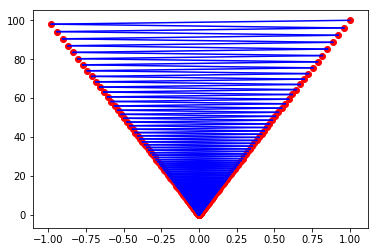

In [5]:
for ii in range(len(point_path)-1):
    plt.plot([point_path[ii][0], point_path[ii+1][0]], [point_path[ii][1], point_path[ii+1][1]], color='b')
    plt.scatter(point_path[ii][0], point_path[ii][1], color='r')
plt.show()

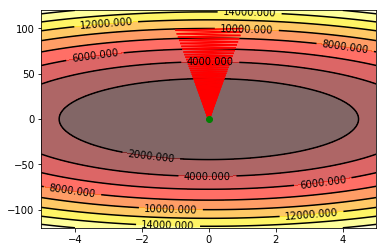

In [6]:
# 定义等高线图的横纵坐标x，y
#从左边取值为从 -3 到 3 ，各取5个点，一共取 5*5 = 25 个点
x = np.linspace(-5, 5, 120)
y = np.linspace(-120, 120, 120)
# 将原始数据变成网格数据
X, Y = np.meshgrid(x, y)

Height = 100*X**2 + Y**2
# 填充颜色
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, Height, 10, colors = 'black')
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)

for ii in range(len(point_path)-1):
    plt.plot([point_path[ii][0], point_path[ii+1][0]], [point_path[ii][1], point_path[ii+1][1]], color='red')
plt.plot(init_point[0], init_point[1], 'go')
plt.show()

可以看到, 在靠近极值点(0,0)的时候会发生来回曲折的现象, 也即为zigzag现象, 这个实际上是被特别提出的例子, 用以说明最速下降法的缺陷, 可以看到需要529次迭代才可以到达满足条件.

这里我们给出一种新的更新方法, 我们使用设置一个alpha的缓冲列表, 使用上一个的步长来计算这一次的迭代公式, 也即为

$$x_{k+1} = x_{k} - \alpha_{k-1}g_{k}$$

In [7]:
def fastgradient_BB(diff1_f, diff2_f, init_point):
    point_path = [init_point]
    g = np.array([diff1_f[i](*init_point) for i in range(len(diff1_f))]) 
    alph_cache = []
    for it in range(1000):
       
        Q = np.zeros((len(diff1_f), len(diff1_f)))
        for ii in range(len(diff1_f)):
            for jj in range(len(diff1_f)):
                Q[ii][jj] = diff2_f[ii][jj](*init_point)
        alph = (np.dot(g, g))/(np.dot(np.dot(g, Q), g))
        alph_cache.append(alph)
        if it == 0:
            alph_cache.append(alph)
        init_point = init_point - alph_cache[0] * g
        alph_cache.pop(0)
        g = np.array([diff1_f[i](*init_point) for i in range(len(diff1_f))])
        if sum(abs(g))<0.01:
            break
        point_path.append(init_point)
    return init_point, point_path

diff1_f = [lambda x, y:200*x, lambda x,y : 2*y]
diff2_f = [[lambda x, y:200, lambda x, y:0],[lambda x, y:0, lambda x,y:2]]
init_point = np.array([1, 100])
init_point, point_path =  fastgradient_BB(diff1_f, diff2_f, init_point)
print('Here we need %d times iteration'%(len(point_path)-1), 
      '\nand the final point is (%s, %s)'%(init_point[0], init_point[1]))

Here we need 112 times iteration 
and the final point is (-6.785194628378122e-10, 0.002298044622395965)


可以看到这里只需要112次迭代就可以满足条件并跳出循环. 

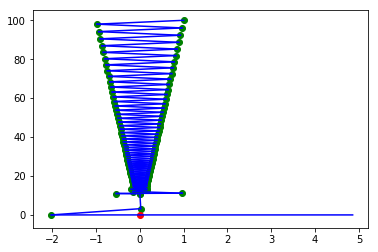

In [8]:
for ii in range(len(point_path)-1):
    plt.plot([point_path[ii][0], point_path[ii+1][0]], [point_path[ii][1], point_path[ii+1][1]], color='b')
    plt.scatter(point_path[ii][0], point_path[ii][1], color='g')
plt.scatter(init_point[0], init_point[1], color='r')
plt.show()

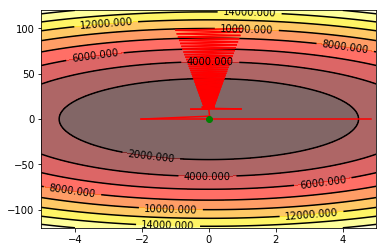

In [9]:
# 定义等高线图的横纵坐标x，y
#从左边取值为从 -3 到 3 ，各取5个点，一共取 5*5 = 25 个点
x = np.linspace(-5, 5, 120)
y = np.linspace(-120, 120, 120)
# 将原始数据变成网格数据
X, Y = np.meshgrid(x, y)

Height = 100*X**2 + Y**2
# 填充颜色
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, Height, 10, colors = 'black')
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)

for ii in range(len(point_path)-1):
    plt.plot([point_path[ii][0], point_path[ii+1][0]], [point_path[ii][1], point_path[ii+1][1]], color='red')
plt.plot(init_point[0], init_point[1], 'go')
plt.show()